In [3]:
!pip install easyocr
!pip install googletrans

     |████████████████████████████████| 63.6 MB 34 kB/s 
     |████████████████████████████████| 47.6 MB 55 kB/s 
     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 1.2 MB 5.5 MB/s 
     |████████████████████████████████| 53 kB 2.9 MB/s 
     |████████████████████████████████| 65 kB 4.8 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=94bda52b7df96449cd5d0020dd026f4ea803ac1f4376fe7ea43199848e947c99
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


4.5.4-dev


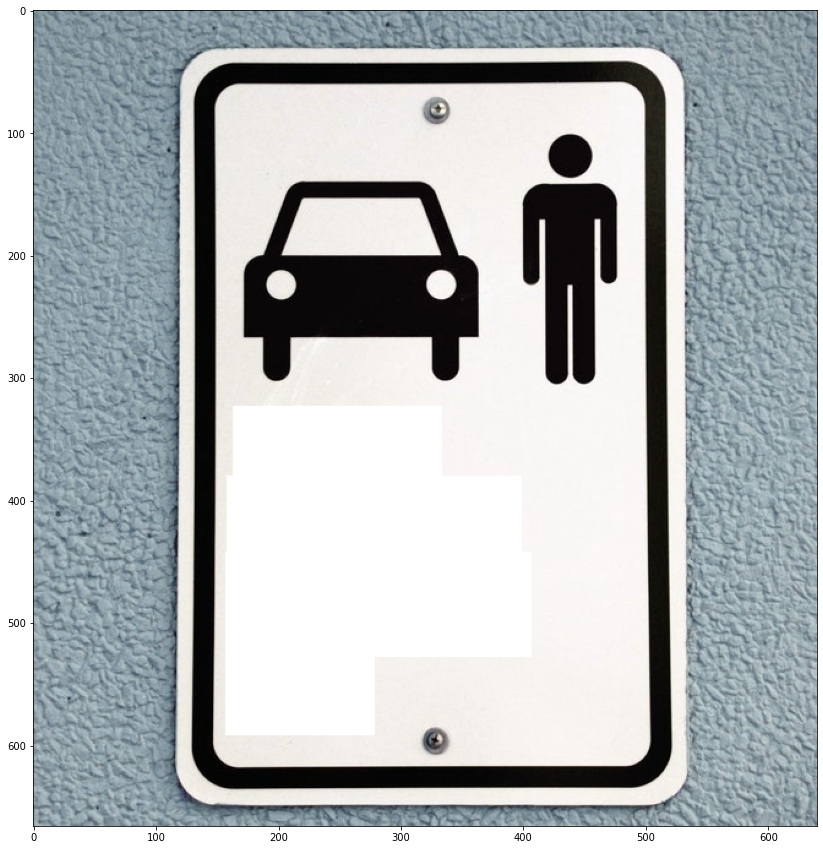

Text_list : ['Patient', 'Pick-Up &', 'Discharge', 'Only']
Tranlated_texts : ['환자', '픽업 &', '퇴원', '오직']


In [13]:
import cv2
import matplotlib.pyplot as plt
import easyocr
import sys
import googletrans
from typing import List
import requests
import pprint

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

print(cv2.__version__)

# 이미지 파일 경로
file_path = r'patient.jpg'
img = cv2.imread(file_path, cv2.IMREAD_COLOR)

CLIENT_ID = "MawiiHEojSbWlRvZjWEM"
CLIENT_SECRET = "gY1PNWHP54"

if img is None:
    print('Image load failed!')
    sys.exit()


# 이미지 출력함수
def display(img):
    # img_rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.show()


def cleanup_text(text):
    # strip out non-ASCII text so we can draw the text on the image
    # using OpenCV
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()


def easy_ocr_result(img, language='en', draw=True, text=False):
    reader = easyocr.Reader([language])
    results = reader.readtext(img)

    # 바운딩박스 리스트
    bbox_list = []
    # 텍스트 리스트
    text_list = []

    if draw == False: # 원래 이미지만 출력
        display(img)

    elif draw == True and text == False: # 이미지에 바운딩 박스그리기
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)
            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            cv2.rectangle(img2, tl, br, (255, 255, 255), -1) # white box

        # show the output image
        display(img2)
        cv2.imwrite("target.jpg", img2) # img2 파일저장 "target.jpg"

    elif draw == True and text == True:  # 이미지에 바운딩 + 인식한 글자
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)

            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            text = cleanup_text(text)
            cv2.rectangle(img2, tl, br, (255, 0, 0), 2)
            cv2.putText(img2, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

        # show the output image
        display(img2)
        
    return bbox_list, text_list


def translate_texts(texts: List[str], type='google') -> List[str]:
    global tranlated_texts
    if type == 'google':
        translator = googletrans.Translator()
        tranlated_texts = [
            translator.translate(text=text, src='en', dest='ko').text
            for text in texts
        ]
    elif type == 'naver':
        url = "https://openapi.naver.com/v1/papago/n2mt"
        header = {"X-Naver-Client-Id": CLIENT_ID, "X-Naver-Client-Secret": CLIENT_SECRET}
        tranlated_texts = []
        for text in texts:
            data = {'text': text, 'source': 'en', 'target': 'ko'}
            response = requests.post(url, headers=header, data=data)
            rescode = response.status_code
            if rescode == 200:
                t_data = response.json()
                tranlated_texts.append(t_data['message']['result']['translatedText'])
            else:
                print("Error Code:", rescode)

    return tranlated_texts


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    _, text_list = easy_ocr_result(img)
    print('Text_list :', text_list)
    tranlated_texts: List[str] = translate_texts(texts=text_list, type='naver')
    print(f'Tranlated_texts : {tranlated_texts}')


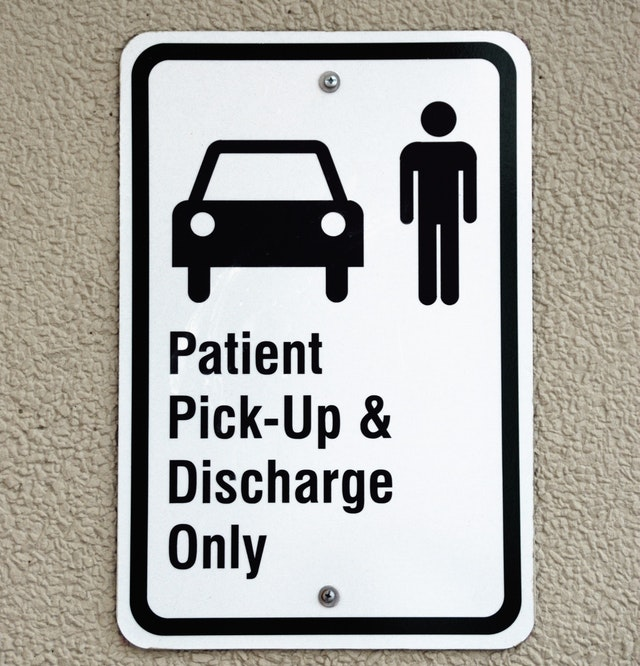

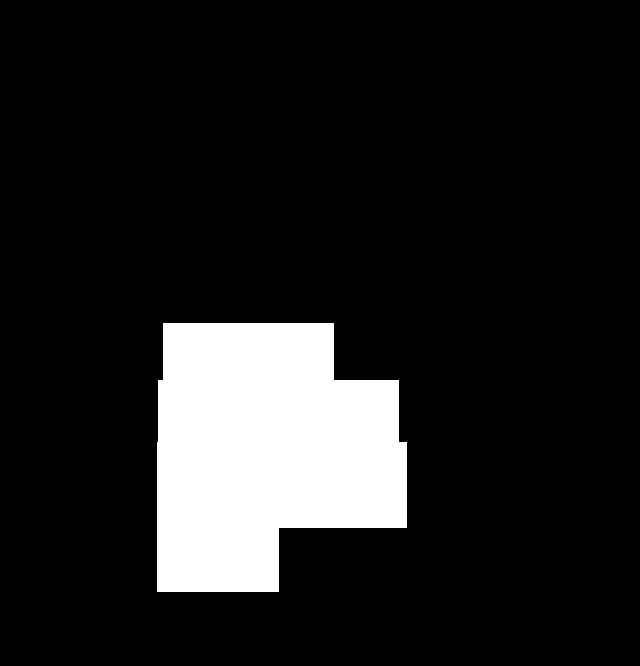

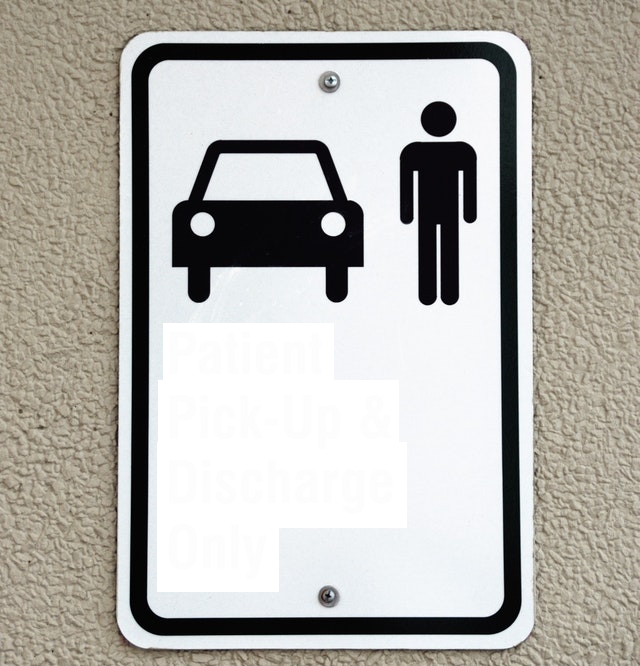

True

In [20]:
# shapes
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load image
img = cv2.imread('patient.jpg')

# Initialize blank mask image of same dimensions for drawing the shapes
shapes = np.zeros_like(img, np.uint8)

# Draw shapes
cv2.rectangle(shapes, (163, 323), (333, 385), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, (158, 380), (398, 458), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, (157, 442), (406, 527), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, (157, 511), (278, 591), (255, 255, 255), cv2.FILLED)


# Generate output by blending image with shapes image, using the shapes
# images also as mask to limit the blending to those parts
out = img.copy()
alpha = 0.01
mask = shapes.astype(bool)
out[mask] = cv2.addWeighted(img, alpha, shapes, 1 - alpha, 0)[mask]

# Visualization
cv2_imshow(img)
cv2_imshow(shapes)

cv2_imshow(out)


#
cv2.imwrite("shapes.jpg", shapes)


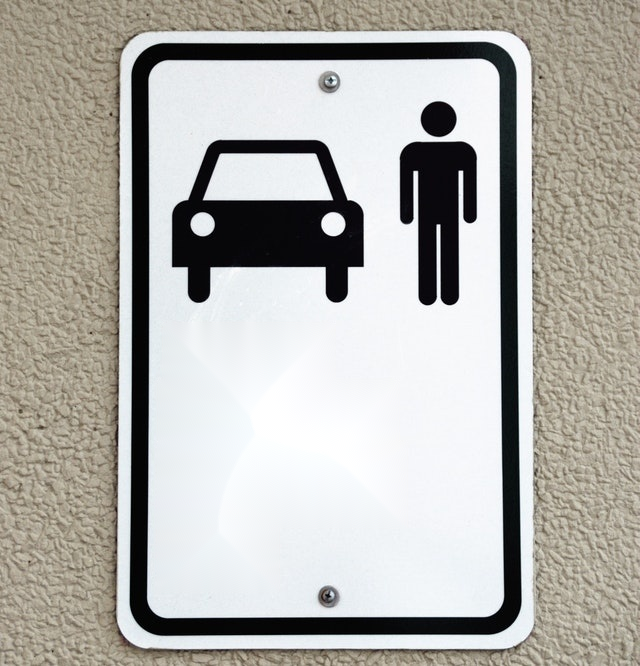

True

In [15]:
# inpaint
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('target.jpg')
mask = cv2.imread('shapes.jpg',0)
dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
cv2_imshow(dst)

# 저장
cv2.imwrite("inpaint.jpg", dst)

In [18]:
from PIL import Image 
from PIL import ImageFont
from PIL import ImageDraw

# db.set_character_set('utf8')
# dbc.execute('SET NAMES utf8;')
# dbc.execute('SET CHARACTER SET utf8;')
# dbc.execute('SET character_set_connection=utf8;')


# font = ImageFont.load_default()
font = ImageFont.truetype("NotoSansKR-Black.otf", 58)

img = Image.open('inpaint.jpg')

draw = ImageDraw.Draw(img)


# draw.text((163, 323), (333, 385)),"AAAAAAAAAAA!",(0,0,0),font=font)
# draw.text((158, 380), (398, 458)),"BBBBBBB & !",(0,0,0),font=font)
# draw.text((157, 442), (406, 527)),"CCCCCC !",(0,0,0),font=font)
# draw.text((157, 511), (278, 591)),"DDDDD !",(0,0,0),font=font)

# text = "안녕"
# draw.text((0, 150), text, (0, 0, 0), font=font)

draw.text((163, 323),"환  자 ",(0,0,0),font=font)
draw.text((158, 380),"픽  업  & ",(0,0,0),font=font)
draw.text((157, 442),"퇴  원 ",(0,0,0),font=font)
draw.text((157, 511),"오  직 ",(0,0,0),font=font)
# cv2.rectangle(shapes, (163, 323), (333, 385), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (158, 380), (398, 458), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 442), (406, 527), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, (157, 511), (278, 591), (255, 255, 255), cv2.FILLED)
# Tranlated_texts : ['환자', '픽업 &', '퇴원', '오직']

# draw=ImageDraw.Draw(im)
# draw.text((13,75),"르브론 제임스 \nLA레이커스",font=ImageFont.truetype("SCDream7.otf", 16), fill=(255,255,255)) 
# im.save("title.png")

img.show()
img.save("imgtext.jpg")

